<h1><center>Linear Classifier</center></h1>
<img src="linearClassifier.jpg" width="600" height="300">


In [1]:
import numpy as np
from utils import load_cifar10
import matplotlib.pyplot as plt

In [2]:
X_train, y_train, X_test, y_test = load_cifar10('C:/Users/asbla/Documents/Resources/cifar-10-batches-py/')

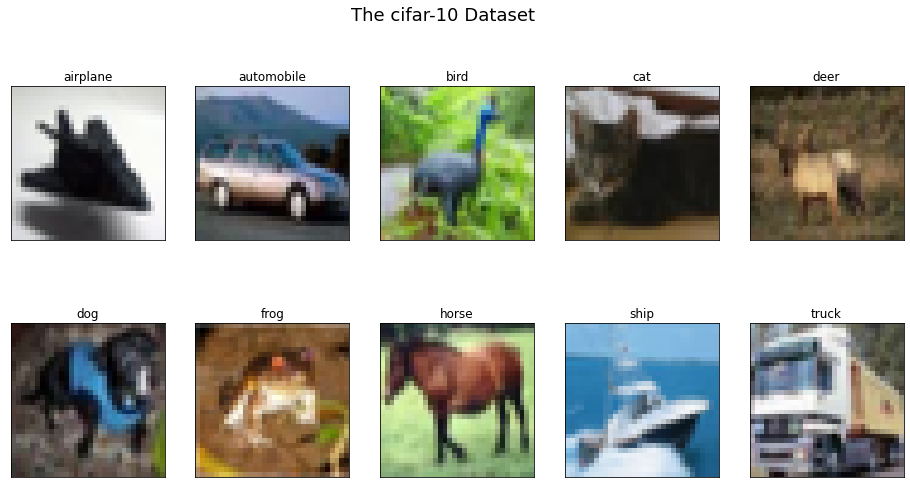

In [3]:
label_names = ['airplane',  'automobile',  'bird',  'cat',  'deer',  'dog',  'frog',  'horse',  'ship',  'truck']

fig, ax = plt.subplots(2,5, figsize=(16,8))
for i in range(10):
    img = X_train[np.where(y_train==i)[0][0]].reshape(32,32,3)
    ax[i//5,i%5].imshow(img)
    ax[i//5,i%5].set_title(label_names[i])
    ax[i//5,i%5].axes.xaxis.set_visible(False)
    ax[i//5,i%5].axes.yaxis.set_visible(False)
plt.suptitle('The cifar-10 Dataset', size=18)
plt.show()

In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test  = X_test.reshape(X_test.shape[0], -1)

In [5]:
# normalizing image data
img_mean = X_train.mean(axis=0)
img_stdv = X_train.std(axis=0)

X_train  = (X_train - img_mean[:,])/img_stdv[:,]
X_test   = (X_test  - img_mean[:,])/img_stdv[:,]

In [6]:
print('shape of X_train:', X_train.shape, '& shape of y_train:', y_train.shape)

shape of X_train: (50000, 3072) & shape of y_train: (50000,)


# Single neuron linear model

In [7]:
n, m = X_train.shape # number of examples, feature dimensions
c = 10 # number of classes

In [8]:
W = np.random.rand(c, m)*0.01
b = np.zeros(c)
print('shape of W:', W.shape, '& shape of b:', b.shape)

shape of W: (10, 3072) & shape of b: (10,)


In [9]:
# Compute Model scores
S = X_train@W.T + b
print('shape of score matrix S:', S.shape)

shape of score matrix S: (50000, 10)


In [10]:
def softmax(S):
    S -= np.max(S, axis=1, keepdims=True) #subtract max from each example for numerical stability
    S_exp   = np.exp(S)
    softmax = S_exp/(np.sum(S_exp, axis=1, keepdims=True))
    return softmax

In [11]:
# Compute softmax from class scores
A = softmax(S)
print('shape of activation/probability matrix A:', A.shape)

shape of activation/probability matrix A: (50000, 10)


In [12]:
# Calculate Cross Entropy loss
loss = -np.sum(np.log(A[np.arange(n), y_train]))
print('loss:',loss)

loss: 116272.42324426741


In [13]:
# d_loss/d_score

dS = A 
dS[np.arange(n), y_train] -= 1

print('shape of dL/dS:', dS.shape)

shape of dL/dS: (50000, 10)


In [14]:
# calculate weight gradients

dW = dS.T@X_train
db = dS.sum(axis=0)

print('shape of dL/dW:', dW.shape)
print('shape of dL/db:', db.shape)

shape of dL/dW: (10, 3072)
shape of dL/db: (10,)


In [15]:
# update weights with learning rate lr
lr = 0.01

W -= lr*dW
b -= lr*db

#### Model is built with above procedure, It is present in same directory under the name linearClassifier.py.  
#### Importing the model to test the performance

# Test Model

In [16]:
from linearClassifier import Linear

In [17]:
clf = Linear()

In [18]:
clf.train(X_train, y_train, no_classes=c)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.54it/s]


In [19]:
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print('Accuracy on test data:',accuracy)

Accuracy on test data: 0.2132


# Visualizing Model Weights

In [20]:
def scale(X):
    return np.array( 255*(X-min(X))/(max(X)-min(X)) , dtype=int)

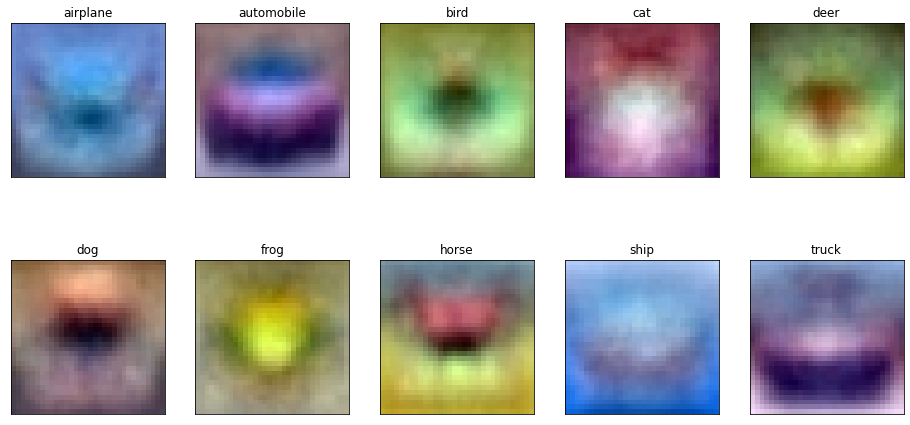

In [21]:
label_names = ['airplane',  'automobile',  'bird',  'cat',  'deer',  'dog',  'frog',  'horse',  'ship',  'truck']

fig, ax = plt.subplots(2,5, figsize=(16,8))
for i in range(c):
    img = scale(clf.W[i]).reshape(32,32,3)
    ax[i//5,i%5].imshow(img)
    ax[i//5,i%5].set_title(label_names[i])
    ax[i//5,i%5].axes.xaxis.set_visible(False)
    ax[i//5,i%5].axes.yaxis.set_visible(False)

## One way to conceptualize The Logistic Regression
If we observe the logistic regression model, we have a weight tensor corresponding to each class, which is of same shape as that of input feature tensor. 
For prediction
- We compute class score by taking a dot product between this weight tensor and input feature tensor.
- then we add the bias.
- Softmax to convert the class scores to probabilities.

As we know that the dot product of two vectors is the indicator of the similarity of two vectors and it attains maximum value when two vectors are pointing in same direction. 

#### So this process of prediction can be viewed as 
- **Computing the similarity of examples with some preset templates for different classes.**
- Better match with the template yielding higher class score.
- (bias term usually account for the relative importance of the class.)
- This template is what we learn during the training process.

#### Training 
Model is trained to give higher class score for the correct class. So it is trying to find the template\[capturing the pattern] for each class which gives high scores for that particular class.

Now with this background if we look at the visualization of weights we will observe that, looking at the training data model tried to come up with some template for each class. Given the inherent complexity of the task fitting single template per class is not sufficient, yet it is helpful to understand what models had tried to do.  

Model tried to predict the correct class for as many training examples as possible, while doing so it came up with some **template** that matches to some extent to different examples in the training set. As a result we can see that template for 'Horse'
class has horse looking blob with heads on both sides, which might have helped the model to capture both those variants of examples.